# Neural network for fitting/regressing a Sin function

#### Maarten Post 2018

In [239]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Data

In [240]:
# Make training and testing data 
# random x points in the range (0,2 pi)
# and the sin of x
training_data_size = 50
x = 2 * 3.14 * np.random.rand(training_data_size, 1)
z = np.arange(0, 2 * 3.14, 0.01)
z = z.reshape(len(z), 1)
y = np.sin(x)

In [241]:
def show(x,y, style=''):
    """Shows the data"""
    plt.plot(z, np.sin(z))
    plt.plot(x, y, style)
    plt.show()

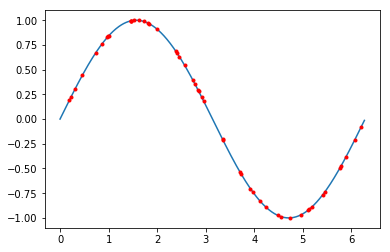

In [242]:
show(x,y,'r.')

### Neural network

In [243]:
# Weights and biases for the neural network
X = tf.placeholder("float", [None, 1])
Y = tf.placeholder("float", [None, 1])

w1 = 15
W1 = tf.Variable(tf.random_normal([1,w1]))
B1 = tf.Variable(tf.random_normal([w1]))

w2 = 25
W2 = tf.Variable(tf.random_normal([w1,w2]))
B2 = tf.Variable(tf.random_normal([w2]))

WO = tf.Variable(tf.random_normal([w2,1]))
BO = tf.Variable(tf.random_normal([1]))

In [244]:
def neural_net(x): 
    """ Links the W and B's together with
    non-linear sigmoid() """
    L1 = tf.sigmoid(tf.matmul(x, W1) + B1)
    L2 = tf.sigmoid(tf.matmul(L1, W2) + B2)
    LO = tf.matmul(L2, WO) + BO
    return LO

### Training

In [245]:
# loss and optimizer function
predictions = neural_net(X)

loss_op = tf.losses.mean_squared_error(labels=Y, predictions=predictions)
optimizer = tf.train.AdamOptimizer(learning_rate=.1)
train_op = optimizer.minimize(loss_op)

init = tf.global_variables_initializer()

In [246]:
epochs = 1000

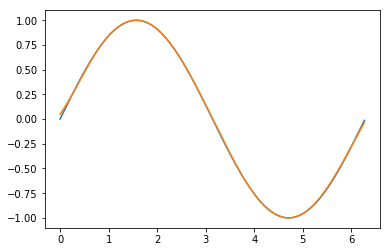

In [247]:
with tf.Session() as sess:
    sess.run(init)
    frames = []
    for i in range(epochs):
        sess.run(train_op, feed_dict={X: x, Y: y})
    
        yz = sess.run(predictions, feed_dict={X: z})
    
        frames.append(yz)

show(z, yz)

### Video

In [230]:
# Reshaping data 
frames = np.array(frames)
frames = frames.reshape(epochs, len(z))
zz = z.reshape(len(z))

In [253]:
# Making animation object
fig = plt.figure()
ax = plt.axes(xlim=(0, 2 * 3.14), ylim=(-1,1))
line, = ax.plot([], [])

def init():
    line.set_data(zz, [])
    return line,

def animate(i):
    y = frames[i]
    line.set_ydata(y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=epochs)

In [255]:
# Saving to mp4 (takes some time)
anim.save('learn_sin.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [62]:
# Result
# https://www.youtube.com/watch?v=XOVeD4vH9Tk&feature=youtu.be

In [254]:
HTML(anim.to_html5_video())